## Exercise 4
Let's dive into the serious business now!

### Description
[Kaggle](http://www.kagle.com/) is a great platform to learn machine learning. They offer free datasets and organize competitions around them. You can even be paid if you win one of them!

Now that you know how to build a classifier, try with [the titanic dataset!](https://www.kaggle.com/c/titanic).

### Steps
1. Download the dataset.
2. Import it in a jupyter notebook.
3. Analyse the data.
4. Divide the dataset. (train data and test data)
5. Build a classifier using the algorithm of you choice and fit it with your train data.
6. Evaluate the model with your test data.
7. When you're satisfied with the result, fit your model with the complete dataset.
8. Predict the Kaggle's test set and [submit your prediciton](https://www.kaggle.com/c/titanic/overview).
9. Which score did you get?

**DISCLAIMER:** If you look at Kaggle's leaderboard, you will see a lot of people have a score of 100%. They just found the name of people that survived online. Great lesson here, when you are learning something, never compare yourself to others. All that matters is what you've learned.

In [19]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))





In [20]:
#Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

path_train = r'E:\Be.code\Machine_learning\additional_resources\datasets\Titanic\train.csv'
path_test = r'E:\Be.code\Machine_learning\additional_resources\datasets\Titanic/test.csv'
path_gender = r'E:\Be.code\Machine_learning\additional_resources\datasets\Titanic\gender_submission.csv'

train_data = pd.read_csv(path_train)
test_data = pd.read_csv(path_test)
gender_data = pd.read_csv(path_gender)

In [21]:
# Shape of data
print(f'Training data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')


Training data shape: (891, 12)
Test data shape: (418, 11)


In [22]:
#training data info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
#basic statis
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [24]:
# train data columns
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

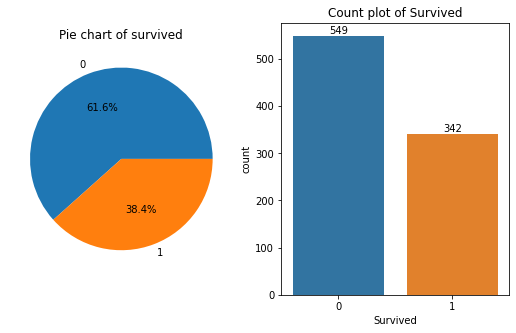

In [25]:
# Survivers Data
# 1: survived, 0: Deceased
plt.figure(figsize=(9,5))

plt.subplot(121)
plt.pie(train_data.Survived.value_counts(), labels=train_data.Survived.value_counts().index, autopct='%.1f%%')
plt.title('Pie chart of survived')

plt.subplot(122)
ax = sns.countplot(data=train_data, x='Survived')
ax.bar_label(ax.containers[0])
plt.title('Count plot of Survived')

plt.show()


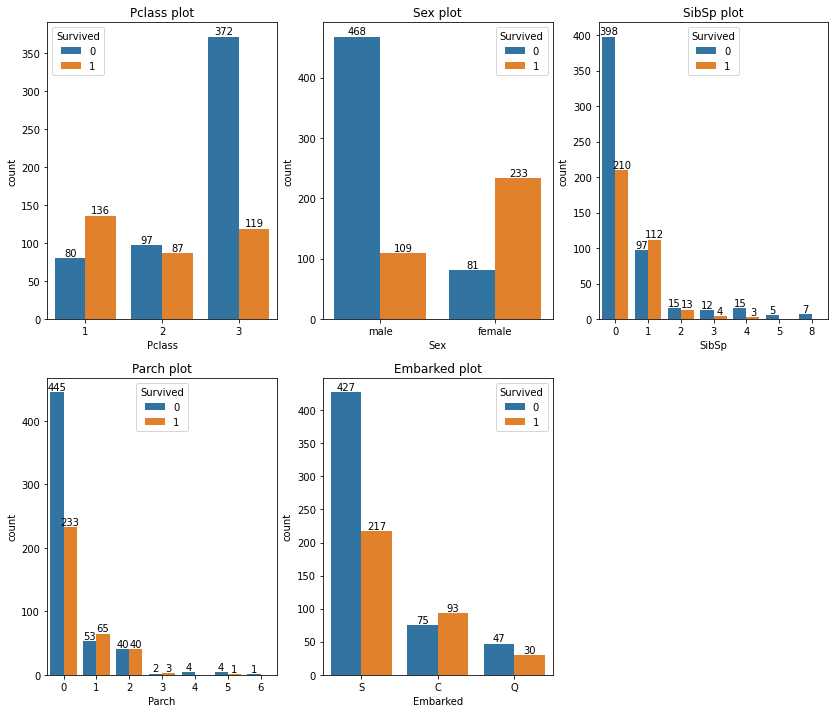

In [26]:
# Other Count plots

countplot_list = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

plt.figure(figsize=(14,12))
for i, col in enumerate(countplot_list):
    plt.subplot(2,3, i+1)
    ax= sns.countplot(data=train_data, x=col,hue='Survived')
    for j in range(len(ax.containers)):
        ax.bar_label(ax.containers[j])
    plt.title(f'{col} plot')
    
plt.show()
        

Text(0.5, 1.0, 'Age Histogram')

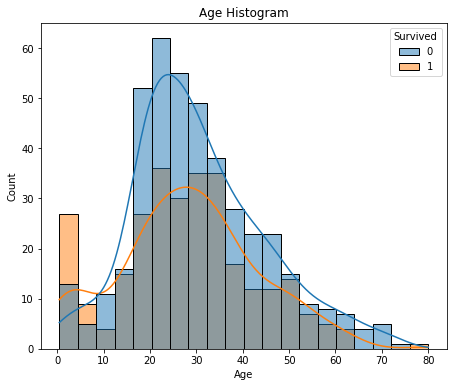

In [27]:
# Survivals based on Age
plt.figure(figsize=(16,6))

plt.subplot(121)
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True)
plt.title('Age Histogram')

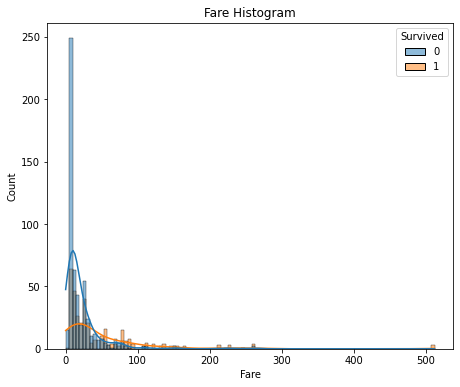

In [28]:
#Survivals based on Fare 
plt.figure(figsize=(16,6))
plt.subplot(122)
sns.histplot(data=train_data, x='Fare', hue='Survived', kde=True)
plt.title('Fare Histogram')
plt.show()


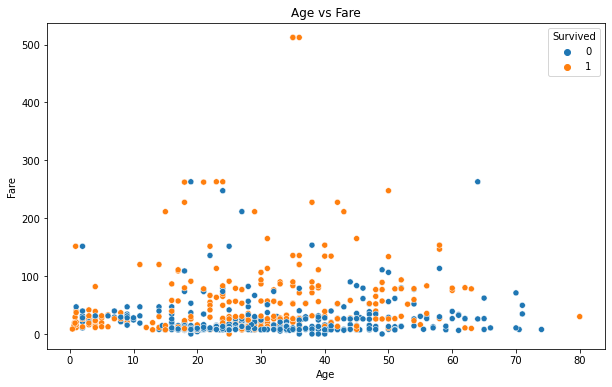

In [32]:
# Survivals based on Age
plt.figure(figsize=(10,6))
sns.scatterplot(data=train_data, x='Age', y='Fare', hue='Survived')
plt.title('Age vs Fare')
plt.show()

#Persons travelled with higher fare tickets were survived more
#Survival percentage of kids upto age 10 also seems good
#most of the persons above age 20 with fares less than 100 were died
#Except few cases age seems not deciding factor

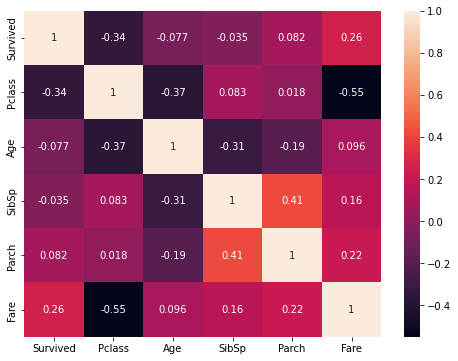

In [34]:
# Corelations

plt.figure(figsize=(8,6))
sns.heatmap(train_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot=True)
plt.show()

#Pclass,Age,SibSp have negative relation with Survived
#Fare and Parch have positive relationships with Survived

In [35]:
#Data Preprocessing
#Separating features and target
#Deletion of PassengerId, Name,Cabin, Ticket features
#Encoding of Sex and Embarked features
#Imputation of values
#Scaling of features
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [36]:
# Separating features and targets
X_train = train_data.drop(['Survived','PassengerId','Name','Cabin','Ticket'],axis=1)
y_train = train_data['Survived']

X_test = test_data.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

In [37]:
# Encoding Sex and Embarked features
encoder = OrdinalEncoder()
encoder_train = pd.DataFrame(encoder.fit_transform(X_train[['Sex','Embarked']]),columns=['Sex','Embarked'])
encoder_test = pd.DataFrame(encoder.transform(X_test[['Sex','Embarked']]),columns=['Sex','Embarked'])

X_train = pd.concat([X_train.drop(['Sex','Embarked'],axis=1),encoder_train],axis=1)
X_test = pd.concat([X_test.drop(['Sex','Embarked'],axis=1),encoder_test],axis=1)

In [38]:
feature_columns = [col for col in X_train.columns]

In [39]:
# Imputation of values
imputer = SimpleImputer(missing_values=np.nan)
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns=feature_columns)
X_test = pd.DataFrame(imputer.fit_transform(X_test),columns=feature_columns)

In [40]:
# Feature Scaling
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = feature_columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns = feature_columns)

In [41]:
#prediction model
rfc = RandomForestClassifier(n_estimators = 100,max_depth=8,random_state=0)

In [42]:
#Fitting on final model
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, random_state=0)

In [43]:
#predictions on train
y_pred_train = rfc.predict(X_train)

In [44]:
# Classification Report on train data set
print('Classification Report on Train Data','\n\n',classification_report(y_train,y_pred_train))

Classification Report on Train Data 

               precision    recall  f1-score   support

           0       0.89      0.98      0.93       549
           1       0.96      0.80      0.87       342

    accuracy                           0.91       891
   macro avg       0.92      0.89      0.90       891
weighted avg       0.91      0.91      0.91       891



In [ ]:
# Predictions on X_test
y_pred = pd.DataFrame(rfc.predict(X_test),columns=['Survived'])


In [ ]:
# Submissions
submissions = pd.concat([test_data.PassengerId,y_pred],axis=1)
submissions.to_csv('submission.csv',index=False)
